<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#INTRODUCTION" data-toc-modified-id="INTRODUCTION-1">INTRODUCTION</a></span></li><li><span><a href="#DATA-PREPROCESSING" data-toc-modified-id="DATA-PREPROCESSING-2">DATA PREPROCESSING</a></span><ul class="toc-item"><li><span><a href="#List-of-features" data-toc-modified-id="List-of-features-2.1">List of features</a></span></li><li><span><a href="#Important-Features" data-toc-modified-id="Important-Features-2.2">Important Features</a></span></li><li><span><a href="#Dealing-with-Missing-Values" data-toc-modified-id="Dealing-with-Missing-Values-2.3">Dealing with Missing Values</a></span></li><li><span><a href="#Handling-Categorical-Data" data-toc-modified-id="Handling-Categorical-Data-2.4">Handling Categorical Data</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2.5">Visualization</a></span></li><li><span><a href="#THE-NAIVE-WAY" data-toc-modified-id="THE-NAIVE-WAY-2.6">THE NAIVE WAY</a></span></li><li><span><a href="#Splitting-our-data-into-training-and-test-sets." data-toc-modified-id="Splitting-our-data-into-training-and-test-sets.-2.7">Splitting our data into training and test sets.</a></span></li><li><span><a href="#Standardization" data-toc-modified-id="Standardization-2.8">Standardization</a></span></li></ul></li><li><span><a href="#TRAINING" data-toc-modified-id="TRAINING-3">TRAINING</a></span></li><li><span><a href="#MODEL-EVALUATION" data-toc-modified-id="MODEL-EVALUATION-4">MODEL EVALUATION</a></span><ul class="toc-item"><li><span><a href="#The-Learning-Curve" data-toc-modified-id="The-Learning-Curve-4.1">The Learning Curve</a></span><ul class="toc-item"><li><span><a href="#Deductions" data-toc-modified-id="Deductions-4.1.1">Deductions</a></span></li></ul></li><li><span><a href="#Validation-Curve" data-toc-modified-id="Validation-Curve-4.2">Validation Curve</a></span></li><li><span><a href="#The-Confusion-Matrix" data-toc-modified-id="The-Confusion-Matrix-4.3">The Confusion Matrix</a></span></li><li><span><a href="#The-Receiver-Operating-Characteristic" data-toc-modified-id="The-Receiver-Operating-Characteristic-4.4">The Receiver Operating Characteristic</a></span></li></ul></li><li><span><a href="#SUMMARY" data-toc-modified-id="SUMMARY-5">SUMMARY</a></span></li></ul></div>

## INTRODUCTION

Machine Learning is mostly used to make predictions from already existing data. I am very **new** to machine learning so in this notebook, my goal is to familiarize myself with already existing algorithms and how to apply to them. The classifier i'll be using here is the ***Logistic Regression classifier***.

I'll start by getting familiar with the data.

## DATA PREPROCESSING
### List of features

In [17]:
import pandas as pd
import numpy as np


## let's import the data
data = pd.read_csv('Churn_Modelling.csv')
data.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Important Features
I won't be using all the dimensions in my dataset for now so I dropped a few columns.

In [18]:
## these are the features I want to use for now.
data.columns[3:-1]

## let's drop the features I won't be using.
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


### Dealing with Missing Values
Luckily for me, I do not have any missing values.

In [19]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Handling Categorical Data
Some of the columns in the dataset contain categorical data, typically the Gender and Geography fields. Let's do something about those.

In [20]:
## let's map the string Data to integers by using the map() function
geography_dict = {val : idx for idx, val in enumerate(np.unique(data['Geography'].values))}
gender_dict = {val : idx for idx, val in enumerate(np.unique(data['Gender'].values))}

## Now let's map these dictionaries to the selected features
data['Geography'] = data['Geography'].map(geography_dict)
data['Gender'] = data['Gender'].map(gender_dict)

data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1


### Visualization
We can use ***seaborn*** to plot the relationships between the features as well as their individual distributions. I'll use this method because later in my research, I will talk about the relationships.

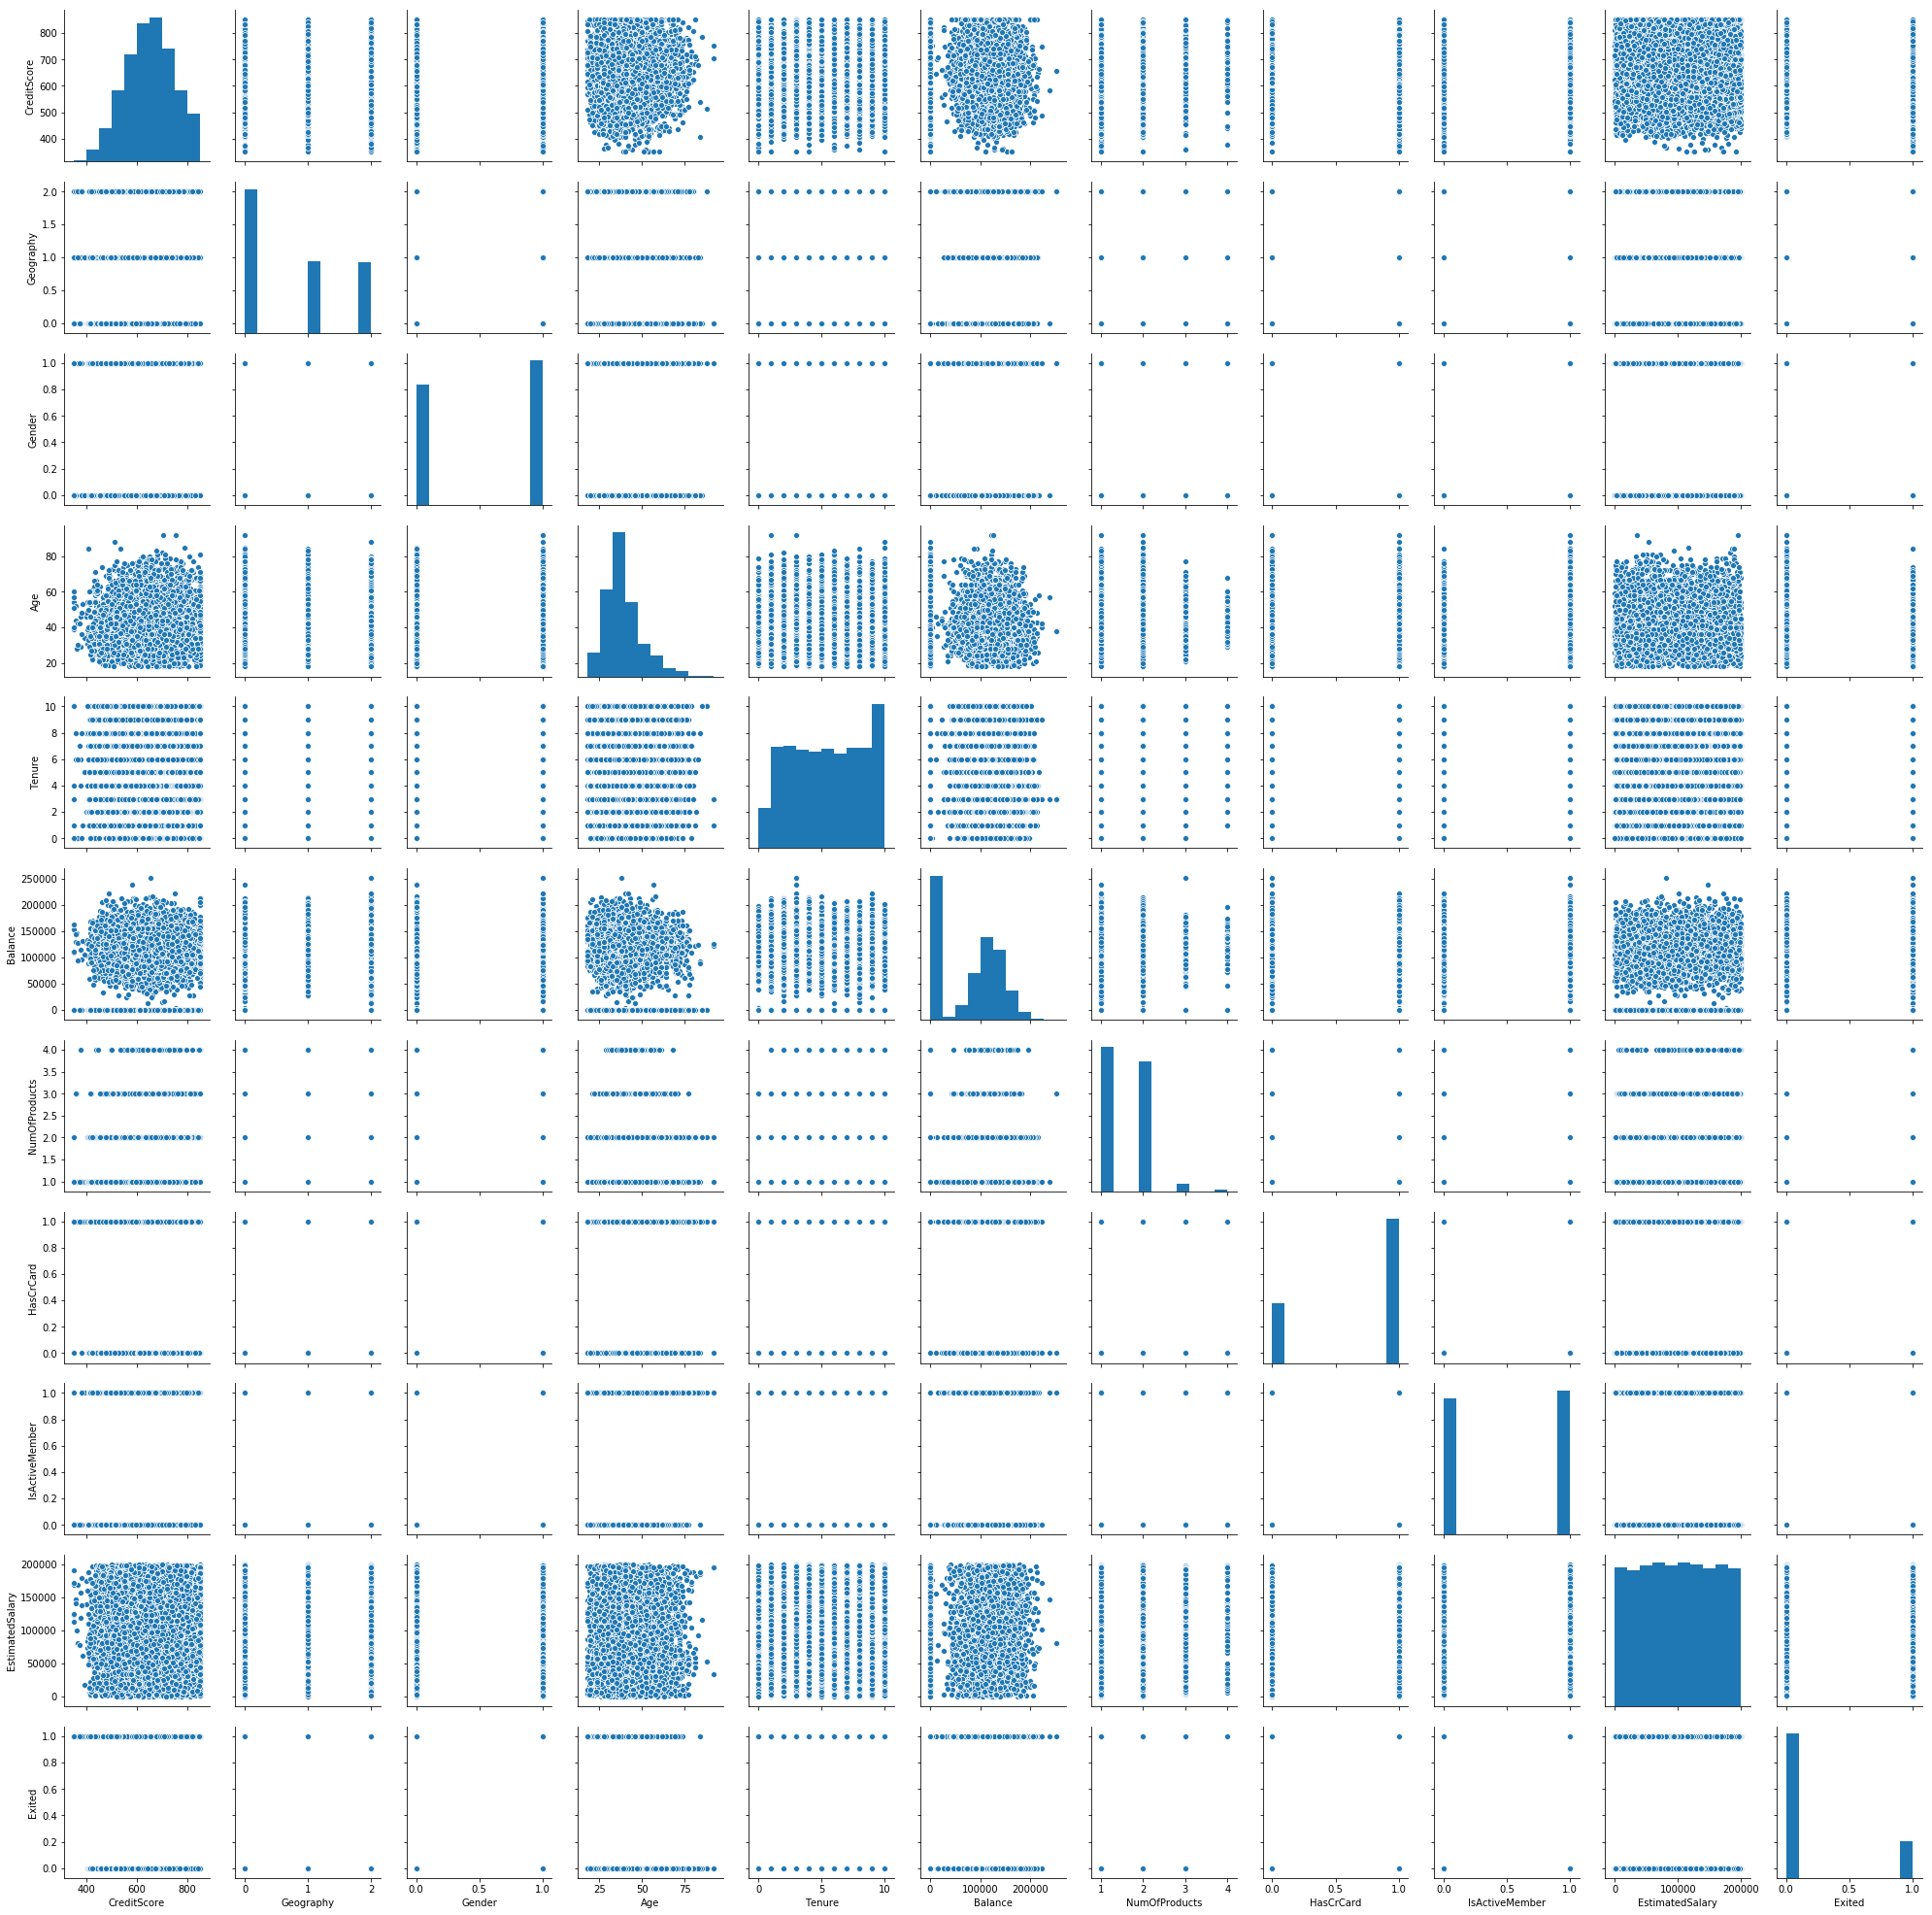

In [21]:
import seaborn as sns
## I am more interested in the diagonals.
sns.pairplot(data)

To satisfy my curiosity, I'll plot the distribution of the Age Feature.

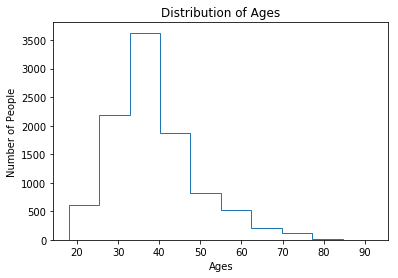

In [6]:
from matplotlib import pyplot as plt
ages = data['Age'].values
plt.hist(ages, histtype='step', align='mid')
plt.xlabel('Ages')
plt.ylabel('Number of People')
plt.title('Distribution of Ages')
plt.show()

Looks like most of the customers in this data are between the ages of **30 - 40**. Good stuff. However I also want to know if there is a relationship between a customer's ***age*** and his ***salary***.

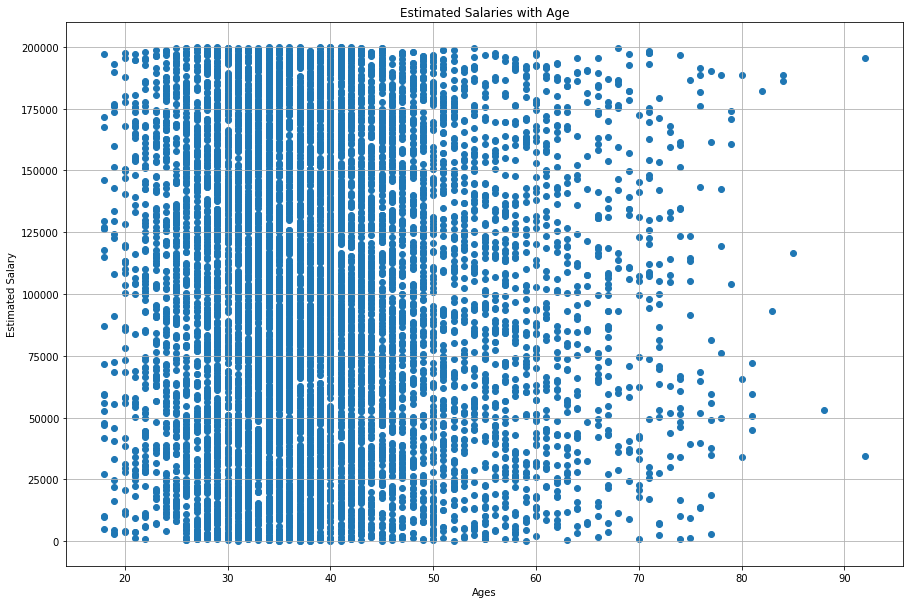

In [7]:
ages = data['Age'].values
estimated_salary = data['EstimatedSalary'].values
fig = plt.figure(figsize=(15, 10))
plt.scatter(ages, estimated_salary)
plt.grid()
plt.xlabel('Ages')
plt.ylabel('Estimated Salary')
plt.title('Estimated Salaries with Age')
plt.show()

Looks like the average salary of an age group reduces with an increase in the age. Another insight is, above the age 90, just 2 people earn salaries. There's a lot more that can be inferred from this plot but I'll end here.

### THE NAIVE WAY

There are some **assumptions** that have to be made before using Logistic Regression on any dataset. Below I have listed some of the ones that I found while researching.
- Logisitic regression does not require a linear relationship between the dependent and independent variable.
- Homoscedasticity is not required unlike in linear regression.
- The dependent variable is not measured on an interval.
- Observations must be independent of each other, in other words, observations should not come from repeated   measurements or matched data.
- Logistic regression assumes linearity of independent variables and log odds.
- The dependent variable should be dichotomous in nature.
- It works well when there are no outliers in your data.
- It also works well when there is no multicollinearity in our predictors. 
- The dataset must be linearly seperable.

***PS***. A logistic regression model would do better on a dataset that has a **balanced distribution** of classes, compared to a dataset that has an imbalance. There are a number of ways to go about class imbalance, and I will explore some of them.

But I'll start by training my model in a **Naive way**, I won't consider any of the assumptions listed above. Later I'll compare the performance of this model with one that follows the assumptions.

### Splitting our data into training and test sets.

Now that I am sure my dataset only contains numeric values, I'll split them into training and test sets.

In [8]:
from sklearn.model_selection import train_test_split
data = np.array(data)
X = data[:, :-1] 
y = data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### Standardization

Many learning algorithms require input features on the same scale for optimal performance. So we'll standardize our data using ***sklearn***.

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## TRAINING

We are now ready to train our multivariate logistic regression model.

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', random_state=123)

## k-fold cross validation
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=10, random_state=1).split(X_train_std, y_train)

## now we'll train our model
scores = []
for k, (train, test) in enumerate(folds):
    lr.fit(X_train_std[train], y_train[train])
    score = lr.score(X_train_std[test], y_train[test])
    scores.append(score)
    print("Fold %2d, Class Distribution.: %s, Acc %.3f" % (k+1, np.bincount(y_train[train].astype(int)), score))

print('\nCV Accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))        

Fold  1, Class Distribution.: [5016 1283], Acc 0.802
Fold  2, Class Distribution.: [5016 1283], Acc 0.802
Fold  3, Class Distribution.: [5016 1283], Acc 0.816
Fold  4, Class Distribution.: [5016 1283], Acc 0.802
Fold  5, Class Distribution.: [5017 1283], Acc 0.804
Fold  6, Class Distribution.: [5017 1283], Acc 0.816
Fold  7, Class Distribution.: [5017 1284], Acc 0.810
Fold  8, Class Distribution.: [5017 1284], Acc 0.791
Fold  9, Class Distribution.: [5017 1284], Acc 0.807
Fold 10, Class Distribution.: [5017 1284], Acc 0.807

CV Accuracy: 0.806 +/- 0.007


Using my lazy way, I was able to achieve an accuracy of 80%. In this context, this accuracy is not bad at all, but I will like to make it better.

## MODEL EVALUATION

Techniques:
    - ROC AUC
    - Learning Curve
    - Validation Curve
    
We'll also look at the **f1, precision and recall scores**

### The Learning Curve
We want to know whether adding more samples to our dataset will increase accuracy. The learning curve will also be able to tell us if our model overfit or underfit the data.

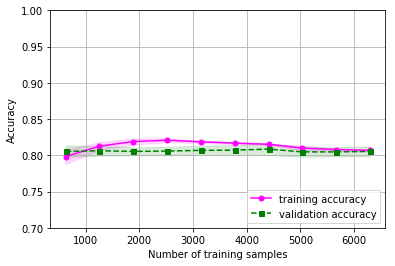

In [11]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=lr, X=X_train_std, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='magenta', marker='o', markersize=5, label='training accuracy')

plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='magenta')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='green', alpha=0.15)

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 1])
plt.show()

#### Deductions

- Our model clearly underfits the data.
- Adding more samples will not increase the accuracy of the model.

### Validation Curve
Our model does not overfit our data, therefore regularization of the learned parameters will not do us any good. Let's visualize this by varying our regularization parameter C, in our LogisiticRegression instance.

<function matplotlib.pyplot.legend(*args, **kwargs)>

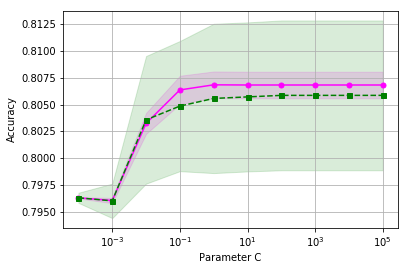

In [12]:
from sklearn.model_selection import validation_curve

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]
train_scores, test_scores = validation_curve(estimator=lr, X=X_train_std, y=y_train, param_name='C', param_range=param_range, cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='magenta', marker='o', markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='magenta')

plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, color='green', alpha=0.15)

plt.grid(True)
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend

We can even see that increasing the regularization strength curtailed the accuracy of our Model.

### The Confusion Matrix
The confusion matrix categorises our predictions into true positives, true negatives, false positives and false negatives.


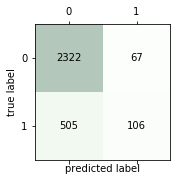

In [13]:
from sklearn.metrics import confusion_matrix
y_predicted = lr.predict(X_test_std)
confmat = confusion_matrix(y_true = y_test, y_pred = y_predicted)

## and we have our confusion matrix, let's make it look a little bit prettier
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Greens, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

We have 572 misclassified samples. 

### The Receiver Operating Characteristic

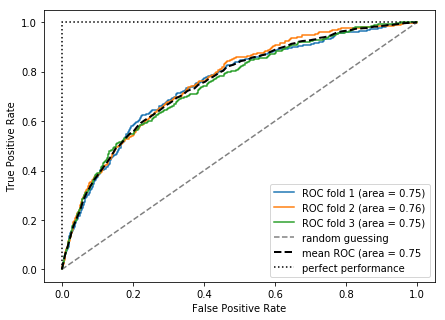

In [14]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

## let's create a list of our cross_validation splits
cv = list(StratifiedKFold(n_splits=3, random_state=1).split(X_train_std, y_train))

## let's create a new figure for our curve
fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

## plot the ROC curves for each fold
for i, (train, test) in enumerate(cv):
    probas = lr.fit(X_train_std[train], y_train[train]).predict_proba(X_train_std[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))


## Let's plot the curve for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.5, 0.5, 0.5), label='random guessing')


## grabbing the mean_tpr over k=3 splits
mean_tpr = mean_tpr / len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black', linestyle='--', label='mean ROC (area = %0.2f' % mean_auc, linewidth=2)

## let's plot the curve for perfect performance
plt.plot([0, 0, 1], [0, 1, 1], 'k:', label='perfect performance')

# Some Annotation
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## SUMMARY
I used a ***Logistic regression model*** to predict customer churn with an accuracy of 80%. I did ***fair*** data preprocessing and I did not follow most of the ***assumptions*** for using a ***Logistic regression model***. With 4 ***model evaluation techniques***, I was able to summarize the performance of my model. In my next research ***(CustomerChurn2.ipynb)***, I will consider all the assumptions I stated above regarding Logistic Regression. Hopefully, that model will be better.